<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Creating-the-environment" data-toc-modified-id="Creating-the-environment-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Creating the environment</a></span><ul class="toc-item"><li><span><a href="#Installing-libraries" data-toc-modified-id="Installing-libraries-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Installing libraries</a></span></li><li><span><a href="#Importing-modules" data-toc-modified-id="Importing-modules-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Importing modules</a></span></li><li><span><a href="#Checking-system-and-setting-it-up" data-toc-modified-id="Checking-system-and-setting-it-up-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Checking system and setting it up</a></span></li></ul></li><li><span><a href="#Data-Exploration" data-toc-modified-id="Data-Exploration-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Exploration</a></span><ul class="toc-item"><li><span><a href="#Data-Preprocessing-&amp;-Feature-Extraction" data-toc-modified-id="Data-Preprocessing-&amp;-Feature-Extraction-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Data Preprocessing &amp; Feature Extraction</a></span></li><li><span><a href="#Removing-email-sent-outside-of-working-hours-(7pm---7am)" data-toc-modified-id="Removing-email-sent-outside-of-working-hours-(7pm---7am)-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Removing email sent outside of working hours (7pm - 7am)</a></span></li><li><span><a href="#E-mail's-spam----1st-cleaning" data-toc-modified-id="E-mail's-spam----1st-cleaning-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>E-mail's spam -- 1st cleaning</a></span></li><li><span><a href="#2nd-cleaning" data-toc-modified-id="2nd-cleaning-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>2nd cleaning</a></span></li></ul></li><li><span><a href="#Logistic-Regression----Spam-/-Non-Spam-Classification" data-toc-modified-id="Logistic-Regression----Spam-/-Non-Spam-Classification-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Logistic Regression -- Spam / Non-Spam Classification</a></span></li><li><span><a href="#K-Means-Clustering-for-subclass-labels" data-toc-modified-id="K-Means-Clustering-for-subclass-labels-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>K-Means Clustering for subclass labels</a></span><ul class="toc-item"><li><span><a href="#Subclass-labelling-automation" data-toc-modified-id="Subclass-labelling-automation-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Subclass labelling automation</a></span></li><li><span><a href="#Email-Content----3rd-cleaning" data-toc-modified-id="Email-Content----3rd-cleaning-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Email Content -- 3rd cleaning</a></span></li></ul></li><li><span><a href="#Data-validation" data-toc-modified-id="Data-validation-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Data validation</a></span></li><li><span><a href="#ML-for-multiclass-labelling" data-toc-modified-id="ML-for-multiclass-labelling-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>ML for multiclass labelling</a></span><ul class="toc-item"><li><span><a href="#ML-Pipeline" data-toc-modified-id="ML-Pipeline-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>ML Pipeline</a></span></li></ul></li></ul></div>

# Creating the environment 

## Installing libraries

In [1]:
# Installing modules
# !pip install datetime

## Importing modules

In [2]:

# Importing libraries
print("Importing libraries ... ")
import pandas as pd
import numpy as np
from collections import Counter
from datetime import datetime, time
import vaex, email, re, string, nltk

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer

from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, adjusted_rand_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score, cross_val_predict
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.offline as py
print("All modules are ready")


Importing libraries ... 
All modules are ready


## Checking system and setting it up

In [3]:
# Setting up the system

def settings():
    # Display python version and operational system-specif parameters 
    import sys
    print("Python version: ", sys.version, "\n")

    # Check the number of cores and memory usage
    import multiprocessing as mp
    num_cores = mp.cpu_count()
    import psutil
    print("This kernel has ", num_cores, "cores and memory usage of:", psutil.virtual_memory(), "\n")

    # # Check Dask and Hosting the diagnostics dashboard
    # cluster = LocalCluster()
    # client = Client(cluster)
    # client

    # Expands the visualization of a matrix
    pd.set_option("display.max_columns", 500)
    pd.set_option("display.max_rows", 500)
    pd.set_option("display.width", 500)
    
    #Checking the directory we are working on
    import os
    print("File directory", os.getcwd())

settings()

Python version:  3.7.6 (default, Jan  8 2020, 13:42:34) 
[Clang 4.0.1 (tags/RELEASE_401/final)] 

This kernel has  4 cores and memory usage of: svmem(total=8589934592, available=2923667456, percent=66.0, used=4386410496, free=27910144, active=2895020032, inactive=2793672704, wired=1491390464) 

File directory /Users/speedy/Desktop/UofT/Course load/INF2179H - Machine Learning/Notebooks


# Data Exploration

## Data Preprocessing & Feature Extraction 

In [4]:
# Loading dataset
file_path = "/Users/speedy/Desktop/UofT/Course load/INF2179H - Machine Learning/Notebooks/Data/"
file_name = "emails.csv"
file = pd.read_csv(file_path + file_name)

# Processing it into columns
body = file["message"]
columns = ["subject","Date","X-From","X-To","X-cc", "X-bcc", "X-Folder", "X-FileName", "From","To","Content-Type", "MsgContent"]
def getheaders(doc):
    table = []
    for i in doc:
        e = email.message_from_string(i)
        arr = []
        for j in columns:
            if j == "MsgContent":
                e.get_payload()
                arr.append(e.get_payload())
            elif (j == "X-From" or j == "X-To") and e[j]:
                arr.append(e[j][:e[j].find("<")])
            else:
                arr.append(e[j])
        table.append(arr)
    return table

res = getheaders(body)
email = pd.DataFrame(res, columns = columns)
email.columns = ["Subject","Date","From(Name)","To(Name)","CC", "BCC", "Folder", "FileName", "From(email)","To(email)","ContentType", "EmailContent"]

# # Saving the clean data in a new .csv file
# email.to_csv(file_path + "email_clean.csv")

# Opening and storing the clean data in a variable for investigation
# email_clean = pd.read_csv(file_path + "email_clean.csv").drop(columns="Unnamed: 0")


In [5]:
msg = email["EmailContent"][2]
msg

'test successful.  way to go!!!'

In [6]:
# Getting unique emails sent by From(Name)
email.iloc[:, 2].value_counts()


Kay Man                     16324
Vince J Kaminsk             14367
Jeff Dasovic                 9701
Enron Announcement           8535
Tana Jone                    8105
                            ...  
Anthony Mlynarz                 1
Alex.A.Molinaroli@jci.co        1
Merritt, Jeremy                 1
Williams, Wilma                 1
Keenan, Sean                    1
Name: From(Name), Length: 24263, dtype: int64

In [7]:
# Getting unique emails received by To(Name)
email.iloc[:, 3].value_counts()


                                          17253
pete.davis@enron.co                        5334
vkaminski@aol.co                           4125
Tana Jone                                  4099
Davis, Pete                                3821
                                          ...  
'kmcguinn@gsb.uchicago.edu                    1
'fokrasin@trigen.com                          1
Friends of the Milken Institute               1
'"Jose E. Figueroa-Lopez"                     1
'kevin.wellenius@frontiereconomics.com        1
Name: To(Name), Length: 48791, dtype: int64

In [9]:
# Confidential emails
enron_conf = email.loc[email["Subject"]=='CONFIDENTIAL'].count()
enron_conf


Subject         25
Date            25
From(Name)      25
To(Name)        25
CC              25
BCC             25
Folder          25
FileName        25
From(email)     25
To(email)       25
ContentType     25
EmailContent    25
dtype: int64

In [10]:
# Top 10 senders and receivers
top10_from = pd.DataFrame(email["From(email)"].value_counts()[:10])
top10_to = pd.DataFrame(email["To(email)"].value_counts()[:10])
top10_to

,To(email)
pete.davis@enron.com,9155
tana.jones@enron.com,5677
sara.shackleton@enron.com,4974
vkaminski@aol.com,4870
jeff.dasovich@enron.com,4350
kate.symes@enron.com,3517
all.worldwide@enron.com,3324
mark.taylor@enron.com,3295
kay.mann@enron.com,3085
gerald.nemec@enron.com,3074


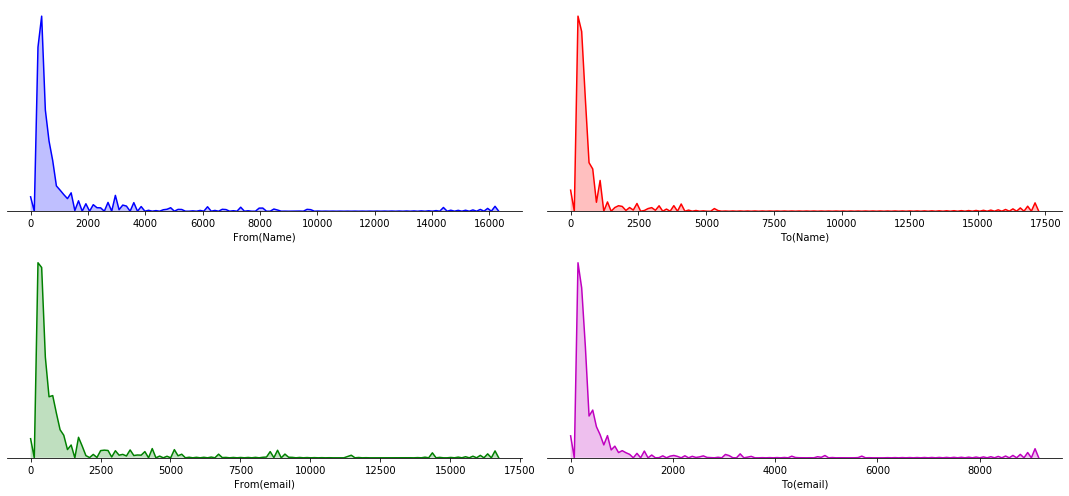

In [11]:
# Plotting emails exchange frequency to check correlation

f, axes = plt.subplots(2, 2, figsize=(15, 7), sharex=False, sharey=False)
sns.despine(left=True)

# Plot a simple histogram with binsize determined automatically
sns.distplot(email["From(Name)"].value_counts(), hist=False, color="b", kde_kws={"shade": True}, ax=axes[0, 0])

# Plot a kernel density estimate and rug plot
sns.distplot(email["To(Name)"].value_counts(), hist=False, color="r", kde_kws={"shade": True}, ax=axes[0, 1])

# Plot a filled kernel density estimate
sns.distplot(email["From(email)"].value_counts(), hist=False, color="g", kde_kws={"shade": True}, ax=axes[1, 0])

# Plot a histogram and kernel density estimate
sns.distplot(email["To(email)"].value_counts(), hist=False, color="m", kde_kws={"shade": True}, ax=axes[1, 1])

plt.setp(axes, yticks=[])
plt.tight_layout()

The above plot requires more investigation, but preliminary findings show discrepancies between Sender's name versus Sender's email as well as Receiver's name versus Receiver's email address. It can be caused due to error in our algorithm but it can also mean that the they are not exclusively using email business accounts as values diverge in more than 0.2 in total volume for the most active agents (Kay and Vince for example).

## Removing email sent outside of working hours (7pm - 7am)

In [ ]:

morning = datetime(1900, 1, 1, 7, 0)
night = datetime(1900, 1, 1, 19, 0)

def droptime(ds):
    for index, row in ds.iterrows():
#         print(index,row['Date'])
        time = row['Date'][16:25].strip()
        cday = datetime.strptime(time, '%H:%M:%S')
        if cday < morning or cday > night:
            #delete row
            ds = ds.drop(index, axis=0)
    return ds

worktime_df = droptime(email)


In [ ]:
# Create Data with no working hours emails 
data1 = email
data2 = worktime_df
df = data1[~data1.index.isin(data2.index)]
df.columns = []
df_nonwork = df

## E-mail's spam -- 1st cleaning 

Unique subject lines were searched, subjects with seemingly "spammy" subjects had full row inspected.

From(Name) was selected by accident, instead of From(email) but choosing the greedy option, decided to include From(email) and From(Name).

Also decided to include spammy subject lines as some spam email came from seemingly regular email addresses spammy names from "From(Name)" column

In [ ]:

fromname = ["\"AnchorDesk\" ",  "\"WSJ.com Editors\" ", "\"Amazon.com\" ",
            "\"CBS SportsLine.com\" ","\"Autoweb.com News\" ","\"The Vixens\" ",
            "\"iWon Announcement\" ","\"Automotive Update\" ","\"Hotel Discounts\" ",
            "\"Earnings.com\" ","Capitol Connection ", "\"Save Now\" ", "\"Cellular Oportunity\" ","\"itsImazing\" ","Consumer Info", "Sprint", "Network Commerce "]

#spammy names from "From(email)" column
fromemail = ["editor@hersweeps.com", "yahoo-delivers@yahoo-inc.com", "members@realmoney.com", "itsimazing@response.etracks.com", "software@mail01.unitedmarketingstrategies.com", "editor@theb2bvoice.com",
          "open2win.0ll1.net@mailman.enron.com", "gifts@info.iwon.com", "important_phone_call@response.etracks.com", "listservices@open2win.1ll0.net",
          "exclusive_ofers@sportsline.com", "anchordesk_daily@anchordesk.zdlists.com","dleduca714@yahoo.com"]

#spammy suject names
spamsub = ["MD2002 IS HERE...                         22799","Download Frogger before it hops away!","We\'re Going \"Nuts\"",
           "Phillip, claim your Holiday gift today!","Put on holiday pounds? Pay Nothing to Lose Weight!","Apply online for a No Deposit VISA or Master Card today!",
            "Have you checked your credit rating lately?","PHILLIP, Check this out now. Get a free* CD player.","Introducing Morpheus 2.0!",
           "Are you in the top 20?","Did you just win $1,000?","Remember the MD2000, Now released MD2002\n                         30375",
            "Contact businesses by fax, phone, mail, email\n                         15060", "DIRECTV is now $1.00","This deal is crazy PHILLIP",
           "PHILLIP, Don't be alone under the mistletoe!","PHILLIP, Is your family protected?","Fw: Are You Living in Debt, Paycheck to Paycheck?3636", "PHILLIP, Get a $5000 credit limit to shop for the Holidays!",
           "November 2001: Car buying tips..","Get 2 FREE Review issues plus a FREE digital camera!","You are pre-approved for a Chase Platinum MasterCard", "PHILLIP, Here's Your Holiday Gift -- A Free Cell Phone!",
           "Phillip, it's trivia time!!","PHILLIP, Coming Soon!","PHILLIP, I have got to share this with you","We're looking for a Winner, Phillip!","Phillip, pick a prize!"]

for index in range(len(enspam["Spam"])):
    if enspam.iloc[:,1][index] in spamsub:# with iloc the entire row is selected and only column 1 is the  focus. index allows the selection of the cell at that row
        enspam.iloc[:, 13][index]=1
    if enspam.iloc[:,3][index] in fromname:
        enspam.iloc[:, 13][index]=1
    if enspam.iloc[:,9][index] in fromemail:
        enspam.iloc[:, 13][index]=1
        
spamrows = enspam[enspam["Spam"]==1]
spamrows.reset_index(drop=True)
# spamrows.to_csv('sptest.csv',index=False)
non_spam=enspam.loc[:350]
non_spam.reset_index(drop=True)
# non_spam.to_csv("nsptest.csv", index=False)
# non_spam=pd.read_csv(r"C:\Users\faria\Documents\Summer2020\INF2179\final project\nsptest.csv")
# spam=pd.read_csv(r"C:\Users\faria\Documents\Summer2020\INF2179\final project\sptest.csv")

df1=non_spam
df2=spam

training_data = pd.concat([df1,df2], verify_integrity=True, ignore_index=True)
# training_data = training_data.to_csv("traindat.csv", index=False)
# training_data = pd.read_csv(r"C:\Users\faria\Documents\Summer2020\INF2179\final project\traindat.csv")

training_data = training_data.sample(frac=1, random_state=10)
training_data.reset_index(drop=True)
rantraindat = training_data.drop(columns=["refindex","Date","To(Name)","ContentType"])

# training_data.to_csv("rantraindat.csv", index=False)



In [ ]:
# Data Cleaning:
# 1. Remove stopwords and stemming words 
# 2. Perform Bag of Words Algorithm 

nltk.download('stopwords')
stopwords = stopwords.words('english')


def tokenize(row):
    if row is None or row is '':
        tokens = ""
    else:
        tokens = row.split(" ")
    return tokens

import re
def Remove_reg(cleaned):
    result = []
    for i in cleaned:
        row = [] 
        for token in tokenize(i):
            token = token.lower()
            token = re.sub(r'[\W\d]', " ", token)
            if token.strip() != "":
                row.append(token.strip())
        result.append(row)
    return result


def BOW(ds):
    stemmer = PorterStemmer()
    unique = []
    for token_list in ds:
        for token in token_list:
            if token not in stopwords:
                token = stemmer.stem(token)
                if token not in unique:
                    unique.append(token)
    df_bow = pd.DataFrame(0,index = np.arange(len(ds)),columns = unique)
               
    for i, item in enumerate(ds):
        for token in item:
            if token in unique:
                df_bow.iloc[i][token] += 1    
    return df_bow


## 2nd cleaning

In [ ]:
#spammy domain names
spam_domain=["@multexinvestornetwork.com", "salespoint.dealerconnection.com","newsletters.microsoft.com","@mailer.realage.com",
            "@outreach.futurestep.com","@mbox.surecom.com","@interchange-energy.com", "@compuserve.com", "@m2.innovyx.com",
           "@s2u2.com","@1800flowers.flonetwork.com","@shop2u.com","@cda01.cdnow.com","@lists.postmastergeneral.com","@postalmanager.com",
            "@tm02.com","@tm03.com","@skytel.com","@lists.economist.com","americanexpress","news",
            "@e-mailprograms.delta.com","@mail3.travelocity.com","@mailb.travelocity.com","@mail.abcnews.go.com", "@pagenetmessage.net","archwireless.net","371.net",
            "@em10.net","id.ru","@echostar.com","@6access.com","@meals.alazing.com","@mail.uole.com.ve","@amazon.com","@aboutdirect.com","aboutdirect.net",
            "@email.msn.com", "@shockwave.com","cooltravelassistant.com","@zdnetonebox.com","@lists.smartmoney.com","administration.enron@enron.com","@internetex.com",
            "@aei.org","aepin@aep.com", "@aggienetwork.com",".americangreetings.com", "offers","@post.intellimedia.com",
            "@yahoo-inc.com","alerts","alumni","@ameritrade.customer-email.com","desk",
            "announce","applicationservice@bdcimail.com",".apple.com","arsystem","notification","auction","bb4eb72a-172de319-86256aaa-4c9060@enron.com",
            ".mgmmirage.net","sportingbetusa.com","@beachheadmusic.com","bizness4u_shoemake@sprintmail.com","@m-ul.com","bmg","coupon","request","bounce","@clickaction.net",
             "support","economist","week","buy","cabbie@unm.edu","owner","list","sports",".ucla.edu","reply","special","auto", "card",
            "mazing","email","citibank","bot","reward","click","client","continental_airlines","@airmail.continental.com","digital","creek","communication","community",
            "saver","conference", "confirm","contact", "consumer", "member", "serv","custom","dailyquote","terrmail3.terrapinn.com","discount","disney", "distribution",
            "dream","ebay","bulletin", "delivery","editor", "market","energyinstitute","energygroup", "seminar", "ethink", "feedback","traffi","cheap","free","fool@motleyfool.com",
            "action","foreign","fortune", "money", "magazine","register" "remind","gold", "golf","gift","guarantee","prize","guest","treat", "cash","ixs1.net","info",
            "saving", "betquick", "quickbet", "design", "@insync-palm.com","invest","tv", "online","kc-mx.avantgo.com", "radioshack","outlook", "photo","tumble2.datek.com","postmaster","subscribe","xmr3.com",
            "deal","humor","sale","save","weight" "loss", "promo", "value", "webmaster","wizard","www","beach","survey","mailman","no.address","40enron","office.chairman","perfmgmt"]

def nospam(dataset):
    for i in range(len(dataset)):
        for j in range(len(spam_domain)):
            word=spam_domain[j]
            if word in dataset.iloc[:, 2][i]:#the from(email) column
                dataset.iloc[:, 5][i]=1 #the spam column
    return dataset

# Dataset with spam
wtlspam = nospam(df_content)

# Dataset with non-spam
wtnospam = wtlspam[wtlspam.Spam != 1] #keep everything not equal to 1
wtnospam.reset_index(drop=True)

# Save them as .csv files
# wtlspam.to_csv("wtlspam.csv",index=False)
# wtnospam.to_csv("wtnospam.csv",index=False)


# Logistic Regression -- Spam / Non-Spam Classification

In [ ]:
# Recursively Predict the whole dataset

# Load label dataset
df_train = pd.read_csv('Data/rantraindat.csv')

# perform bag of words on the labeled dataset
df_bow_label = Remove_reg(df_train['EmailContent'])
df_bow_label = BOW(df_bow_label)


#Save spam label and then drop it
df_spam = df_bow_label['Spam']
df_bow_label = df_bow_label.drop('Spam', axis=1)

# whole dataset
df_workin = pd.read_csv('worktime_df.csv')

# perform bag of words on the whole dataset.
df_content = Remove_reg(df_workin['EmailContent'])
df_content = BOW(df_content)


# concat the label dataset to the top of entire dataset
df_content['Spam'] = ''
df_content = pd.concat([df_bow_label, df_content]).reset_index(drop = True) 
df_content['Spam'] = df_spam


# Apply above methods in the 10,000 samples dataset
size = 1000

while size <= len(df_content.iloc[:10000, :]):
    #print("begin",size)
    LogReg = LogisticRegression(solver='liblinear')
    LogReg.fit(df_content.iloc[:size,:-1], df_content.iloc[0:size,-1])
    Content_test = df_content.iloc[size:size*2,:-1]
    Spam_predict = LogReg.predict(Content_test)
    df_content['Spam'][size:size*2] = Spam_predict
    size = size * 2



In [ ]:


df_content.unique().sum()
# Counter(df_content)

In [ ]:
# print(classification_report(y_test, y_pred))
# print(metrics.accuracy_score(y_test, y_pred))

# K-Means Clustering for subclass labels

In [ ]:
# Preprocessing and tokenizing
def preprocessing(line):
    line = line.lower()
    line = re.sub(r"[{}]".format(string.punctuation), " ", line)
    return line

# making new data frame with dropped NA values 
new_data = wtnospam['Subject'].dropna(axis = 0, how ='any') 

vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(new_data)

# get tfidf score for each word in one sentence
def get_ifidf_for_words(text):
    tfidf_matrix= vectorizer.transform([text]).todense()
    feature_index = tfidf_matrix[0,:].nonzero()[1]
    tfidf_scores = zip([feature_names[i] for i in feature_index], [tfidf_matrix[0, x] for x in feature_index])
    return dict(tfidf_scores)


In [ ]:
# Elbow method
distortions = []
K = range(1,30)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    distortions.append(kmeanModel.inertia_)
    

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()


In [ ]:
#From the elbow graph, We can observe that the “elbow” is the number 24 which is optimal for this case. Now we can run a K-Means using as n_clusters the number 24
true_k = 24
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=1000, n_init=1)
model.fit(X)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind], end='')
        print()

## Subclass labelling automation  

In [ ]:
df = enron

bmeeting = ["meeting", "schedule", "memo", "conference", "agenda", "date"]
bfollowup = ["agreement", "report", "chart", "announcement", "draft", "change", "procedure", "late", "deadline", 
             "proposal", "contract", "letter", "follow-up", "summary", "supplemental", "approval", "template"]
bconfidential = ["confidential", "privacy", "secret", "topsecret", "alert", "board", "committee", "fraud", "scam",
                 "fbi", "investigation", "access", "proceeds", "donation", "transaction", "liquidation", "risk",
                 "lawsuit", "sue", "violation", "criminal", "criminous", "scandal"]
bgeneral = ["gas", "energy", "power", "development", "global", "organizational", "operation", "customer", "intern", 
            "associate", "hiring", "position", "patenting", "finance", "restruct", "balance", "stock", "transport", 
            "model", "management", "executive", "infrastructure"]
pfamilyfriends = ["girlfriend", "boyfriend", "fwd", "buddy", "whassup", "weekend", "plans", "football",
                  "hunt", "friends", "wife", "husband", "hubby", "drugs", "holiday", "season", "winter", "summer"]

df["Label"]='other' #will add a new label with everything being other as a default
df["Label"]=6
def label(dataset):
    for i in range(len(dataset)):
        for j in range(len(bmeeting)):  
            word=bmeeting[j]
            if word in dataset.iloc[:, 0][i]:#change the column position for email content if needed
#                 dataset.iloc[:, -1][i]='bmeeting'
                dataset.iloc[:, -1][i]= 1
            else:
                pass
        for k in range(len(bfollowup)):
            word=bfollowup[k]
            if word in dataset.iloc[:, 0][i]:#change the column position for email content if needed
#                 dataset.iloc[:, -1][i]='bfollowup' 
                dataset.iloc[:, -1][i]=2
            else:
                pass        
        for k in range(len(bconfidential)):
            word=bconfidential[k]
            if word in dataset.iloc[:, 0][i]:#change the column position for email content if needed
#                 dataset.iloc[:, -1][i]='bconfidential'
                dataset.iloc[:, -1][i]=3
            else:
                pass
        for k in range(len(bgeneral)):
            word=bgeneral[k]
            if word in dataset.iloc[:, 0][i]:#change the column position for email content if needed
#                 dataset.iloc[:, -1][i]='bgeneral'
                dataset.iloc[:, -1][i]=4
            else:pass
        for k in range(len(pfamilyfriends)):
            word=pfamilyfriends[k]
            if word in dataset.iloc[:, 0][i]:#change the column position for email content if needed
#                 dataset.iloc[:, -1][i]='pfamilyfriends'
                dataset.iloc[:, -1][i]=5
    return dataset

enron_final = label(df)

## Email Content -- 3rd cleaning 

In [ ]:
#pre-processing
def clean_str(string):
    """
    Tokenization/string cleaning for dataset
    Every dataset is lower cased except
    """
    string = re.sub(r"\n", "", string)  
    string = re.sub(r"\\n", "", string) 
    string = re.sub(r"\r", "", string) 
    string = re.sub(r"[0-9]", "digit", string)
    string = re.sub(r"\'", "", string)    
    string = re.sub(r"\"", "", string) 
    string = re.sub(r"\\'", "", string)    
    string = re.sub(r"\\", "", string) 
    string = re.sub(r"--", "", string)
    return string.strip().lower()


X = []
for i in range(enron_final.shape[0]):
    X.append(clean_str(enron_final.iloc[i][0]))


# enron_str = clean_str(str(enron_final["EmailContent"]))
enron = pd.DataFrame(X)
X.columns = ["EmailContent"]
y = np.array(enron_final["Label"])
# enron["Label"] = enron_final["Label"]

# Data validation

In [ ]:
# printing the first two lines on the dataset
enron_final.head(2)

In [ ]:
# Exploration 1st step
def exploration():
    # Dataset type
    print("Dataset type is: ", type(enron_final), "\n")
    
    # Data shape
    print("The data shape is: ", enron_final.shape, "\n")
    
    # Checking for duplicates
    dup = enron_final.duplicated().sum()
    print("This dataset has ", dup, "duplicated values\n")
    
    # Column names
    print("Column names are: ", enron_final.columns)
    
    # Checking null values
    print("It has ", enron_final.isnull().sum(), " null values.")

exploration()

In [ ]:
# Unique Labels count
Counter(enron_final["Label"])

In [ ]:
enron_final.head(2)

# ML for multiclass labelling

## ML Pipeline 

In [ ]:
#pipeline of feature vectorizer/transformer and model
model = Pipeline([("vectorizer", CountVectorizer()), ("tfidf", TfidfTransformer()),
                  ("DT", OneVsRestClassifier(DecisionTreeClassifier()))])
#the class_weight="balanced" option tries to remove the biasedness of model towards majority sample

#paramater selection
parameters = {'vectorizer__ngram_range': [(1, 1), (1, 2),(2,2)],
               'tfidf__use_idf': (True, False)}
gs_clf_svm = GridSearchCV(model, parameters, n_jobs=-1)
gs_clf_svm = gs_clf_svm.fit(X[:10000], y[:10000])

print("DT best score is: ", gs_clf_svm.best_score_)
print("DT params: ", gs_clf_svm.best_params_)